## Model Analysis: one_hidden_net 

In [70]:
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [16]:
pred = pd.read_csv('../src/predict/predictions/one_hidden_test_audio_20f.csv', names=['orig'])
pred_sig = pd.read_csv('../src/predict/predictions/one_hidden_test_audio_20f_sig.csv', names=['sig'])
pred_sgd = pd.read_csv('../src/predict/predictions/one_hidden_test_audio_20f_sig_sgd.csv', names=['sgd'])
pred_adam = pd.read_csv('../src/predict/predictions/one_hidden_test_audio_20f_sig_adam.csv', names=['adam'])
true = pd.read_csv('../../../Source/Data/y_test_mfccplus.csv')

In [17]:
results = pd.concat([pred, pred_sig, pred_sgd, pred_adam, true], axis= 1)

In [86]:
mistakes = results.copy()
mistakes = mistakes.loc[~(mistakes['Labels'] == mistakes['orig'] | mistakes['sig'] | mistakes['sgd'] | mistakes['adam'])]
mistakes

,orig,sig,sgd,adam,Labels
4,0,0,1,1,0
5,0,0,0,1,0
6,0,0,0,1,0
10,0,0,0,1,0
12,0,0,0,1,0
13,0,1,1,0,0
14,0,0,0,1,0
17,0,0,0,1,0
18,1,1,0,1,0
22,0,0,0,1,0


In [75]:
acc_dict = {}
for i in results.columns[:4]:
    acc_dict[str(i)]= accuracy_score(y_pred=results[str(i)], y_true=results['Labels'])

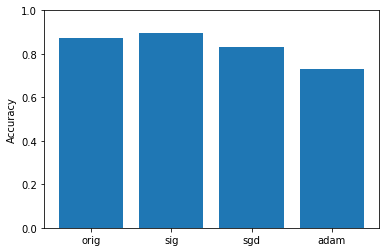

In [80]:
plt.bar(range(len(acc_dict)), acc_dict.values(), align='center')
plt.xticks(range(len(acc_dict)), list(acc_dict.keys()))
plt.ylabel('Accuracy')
plt.ylim(0,1);